In [4]:
from feature_drift import FeatureDrift
from feature_handling import FeatureHandling2
import pandas as pd
from dataframe_observer import DataframeObserver

In [5]:
df1 = pd.read_csv('../data/titanic_train.csv')
df2 = pd.read_csv('../data/titanic_test.csv')

-----------------df1 summary--------------------------
Type: object
Rows: 891
Distinct: 3
Missing: 2
Missing%: 0.002244668911335578
-----------------df1 top 3 values:--------------------
  Embarked  Count         %     Cum.%
0        S    644  0.724409  0.724409
1        C    168  0.188976  0.913386
2        Q     77  0.086614  1.000000
-----------------df2 summary--------------------------
Type: object
Rows: 45
Distinct: 3
Missing: 0
Missing%: 0.0
-----------------df2 top 3 values:--------------------
  Embarked  Count         %     Cum.%
0        S     34  0.755556  0.755556
1        C      7  0.155556  0.911111
2        Q      4  0.088889  1.000000


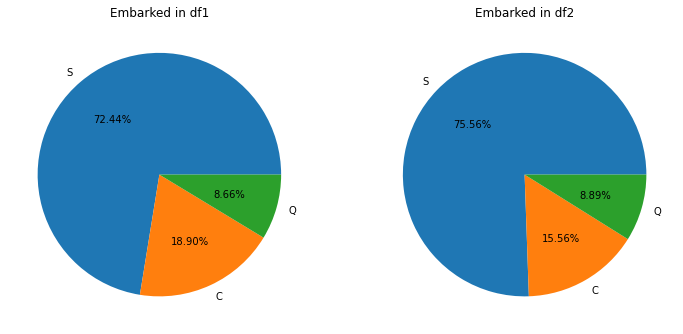

In [6]:
FeatureDrift.categorical_detection(df1, df2, 'Embarked')

               df1        df2
Type       float64    float64
Rows           891         45
Min           0.42          1
Max             80         54
Mean       29.6991    27.1579
Median          28         26
Mode            24         24
StdDev     14.5265    11.8607
Distinct        88         26
Sum        21205.2       1032
Missing        177          7
Missing%  0.198653   0.155556
Skewness  0.389108  0.0919109
Kurtosis  0.178274   0.132543
Outliers        11          0
Q1          20.125      21.25
Q3              38      35.75
IQR         17.875       14.5
Down       -6.6875       -0.5
Up         64.8125       57.5


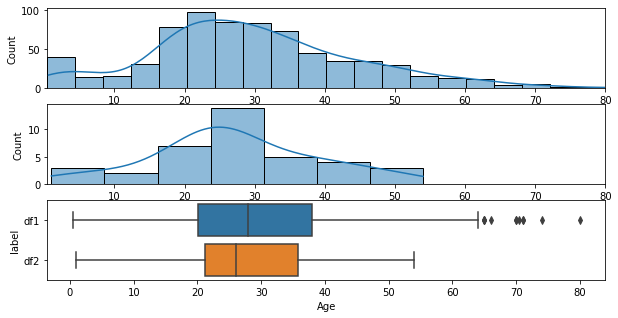

In [7]:
FeatureDrift.numerical_detection(df1, df2, 'Age')

In [8]:
df1 = pd.read_csv('../data/california_train.csv')
df2 = pd.read_csv('../data/california_test.csv')

In [9]:
df1.drop('SalePrice', axis=1, inplace=True) # drop target
df1.drop('Id', axis=1, inplace=True) # drop id
df2.drop('Id', axis=1, inplace=True) # drop id

In [10]:
fh = FeatureHandling2(df1, df2)
fh.auto_imputers()
df1,df2 = fh.general_encoder(ordinal_cols=df1.select_dtypes(include='object').columns.tolist())

In [11]:
df1.shape, df2.shape

((1460, 79), (1459, 79))

In [12]:
FeatureDrift.adversarial_detection(df1,df2,auroc_tolerance=0.002)

auroc safe range: [0.498, 0.502]
Feature drift warning (roc = 0.5091): drop BsmtFinSF1
Feature drift warning (roc = 0.5119): drop GrLivArea
Feature drift warning (roc = 0.4866): drop TotalBsmtSF
Feature drift warning (roc = 0.5124): drop GarageArea
Feature drift warning (roc = 0.5048): drop LotArea
No feature drift detected  (roc = 0.5004)
['BsmtFinSF1', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'LotArea']
